In [6]:
import pandas as pd
df = pd.read_csv('/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv')
print(df.head())

   Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2      1.4      2   0     2    yes  
3      0.8      2   0     2    yes  
4      0.6      2   0     2    yes  


In [8]:
import numpy as np 
from sklearn.preprocessing import StandardScaler

In [10]:
print("Before Standardization:")
print(df.describe())

Before Standardization:
       Unnamed: 0         age          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  299.000000  302.000000  303.000000   
mean   151.000000   54.366337    0.966997  131.712375  246.317881    0.148515   
std     87.612784    9.082101    1.032052   17.629032   51.908285    0.356198   
min      0.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     75.500000   47.500000    0.000000  120.000000  211.000000    0.000000   
50%    151.000000   55.000000    1.000000  130.000000  240.500000    0.000000   
75%    226.500000   61.000000    2.000000  140.000000  274.750000    0.000000   
max    302.000000   77.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  298.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.865772    0.326733    1.039604    1.399340    0.729373   
std

In [12]:
scaler = StandardScaler()

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

df_standardized = pd.DataFrame(scaler.fit_transform(df_numeric),
                              columns=numeric_columns,
                              index=df.index)

non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    df_non_numeric = df[non_numeric_columns]
    df_standardized = pd.concat([df_standardized, df_non_numeric], axis=1)

print("\nAfter Standardization:")
print(df_standardized.describe())


After Standardization:
       Unnamed: 0           age            cp      trestbps          chol  \
count  303.000000  3.030000e+02  3.030000e+02  2.990000e+02  3.020000e+02   
mean     0.000000  4.690051e-17  2.345026e-17  7.129191e-17  2.043987e-16   
std      1.001654  1.001654e+00  1.001654e+00  1.001676e+00  1.001660e+00   
min     -1.726344 -2.797624e+00 -9.385146e-01 -2.142806e+00 -2.321741e+00   
25%     -0.863172 -7.572802e-01 -9.385146e-01 -6.654937e-01 -6.815193e-01   
50%      0.000000  6.988599e-02  3.203122e-02 -9.729662e-02 -1.122660e-01   
75%      0.863172  7.316189e-01  1.002577e+00  4.709005e-01  5.486467e-01   
max      1.726344  2.496240e+00  1.973123e+00  3.880083e+00  6.130224e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  3.030000e+02  3.030000e+02  2.980000e+02  3.030000e+02  3.030000e+02   
mean  -2.345026e-17  1.465641e-16 -4.768743e-17 -4.690051e-17  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001682e+

In [14]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 Rows:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe(include='all'))
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (303, 15)

Data Types:
Unnamed: 0      int64
age             int64
sex            object
cp              int64
trestbps      float64
chol          float64
fbs             int64
restecg         int64
thalach       float64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target         object
dtype: object

First 5 Rows:
   Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2    

Text(0.5, 1.0, 'Distribution of Chol')

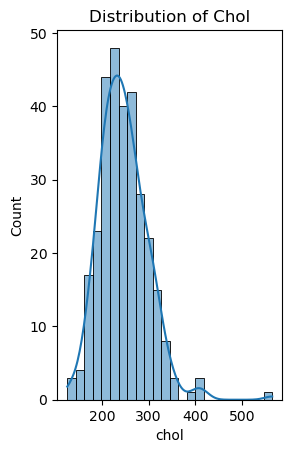

In [20]:
#Histogram of Cholestorol
plt.subplot(1,2,1)
sns.histplot(df['chol'], kde=True)
plt.title('Distribution of Chol')

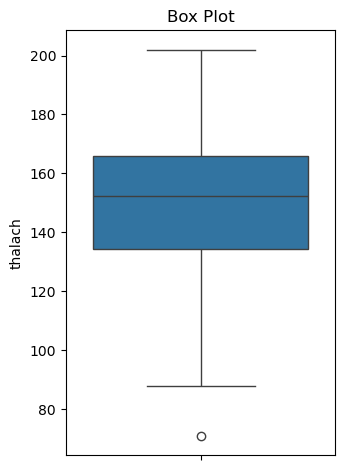

In [22]:
#Box Plot
plt.subplot(1,2,2)
sns.boxplot(y=df['thalach'])
plt.title("Box Plot")
plt.tight_layout()
plt.show()

In [24]:
#NA Values
print("\nMissing Values:")
display(df.isna().sum())


Missing Values:


Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

Text(0.5, 1.0, 'Old Peak vs Slope')

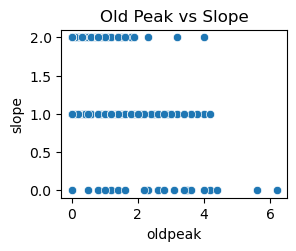

In [26]:
plt.subplot(2,2,3)
sns.scatterplot(x='oldpeak', y='slope', data=df)
plt.title('Old Peak vs Slope')

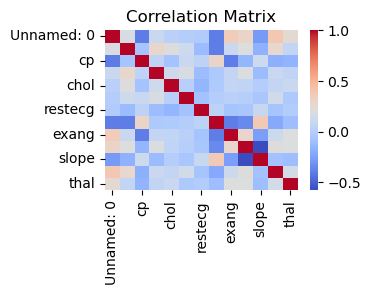

In [28]:
#Correlation Heatmap
plt.subplot(2,2,4)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [30]:
#Standardize 
for col in df.columns:
    mask = np.random.random(len(df)) < 0.1
    df.loc[mask, col] = np.nan

# Display original data info
print("Original Data:")
print(f"Shape: {df.shape}")
print("\nMissing values per column:")
print(df.isna().sum())
print("\nSummary statistics before processing:")
print(df.describe())

Original Data:
Shape: (303, 15)

Missing values per column:
Unnamed: 0    35
age           33
sex           22
cp            28
trestbps      27
chol          30
fbs           34
restecg       32
thalach       37
exang         39
oldpeak       30
slope         28
ca            25
thal          33
target        24
dtype: int64

Summary statistics before processing:
       Unnamed: 0         age          cp    trestbps        chol         fbs  \
count  268.000000  270.000000  275.000000  276.000000  273.000000  269.000000   
mean   152.246269   54.166667    0.941818  131.561594  246.139194    0.156134   
std     87.381289    9.201079    1.037735   17.404488   52.966996    0.363659   
min      0.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     78.750000   47.000000    0.000000  120.000000  210.000000    0.000000   
50%    150.500000   55.000000    1.000000  130.000000  239.000000    0.000000   
75%    229.250000   61.000000    2.000000  140.000000  275.000000 

In [32]:
#Change Categorical Variables
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(df)

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply the encoder to the 'sex' column
df['sex_encoded'] = le.fit_transform(df['sex'])
df['target_encoded'] = le.fit_transform(df['target'])
print(df.head())

   Unnamed: 0   age     sex   cp  trestbps   chol  fbs  restecg  thalach  \
0         0.0  63.0    male  3.0       NaN  233.0  1.0      0.0    150.0   
1         1.0  37.0     NaN  2.0     130.0  250.0  NaN      1.0    187.0   
2         2.0  41.0  female  1.0     130.0    NaN  0.0      0.0    172.0   
3         3.0  56.0    male  NaN     120.0  236.0  0.0      1.0    178.0   
4         4.0  57.0  female  0.0       NaN  354.0  0.0      1.0    163.0   

   exang  oldpeak  slope   ca  thal target  sex_encoded  target_encoded  
0    NaN      2.3    NaN  0.0   1.0    yes            1               1  
1    0.0      3.5    0.0  0.0   2.0    yes            2               1  
2    0.0      NaN    2.0  0.0   2.0    yes            0               1  
3    0.0      0.8    NaN  0.0   2.0    yes            1               1  
4    1.0      0.6    2.0  0.0   2.0    yes            0               1  


In [34]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

for column in numeric_columns:
    df[column].fillna(0, inplace=True)

for column in categorical_columns:
    df[column].fillna('0', inplace=True)

scaler = StandardScaler()
df_numeric_standardized = pd.DataFrame(
    scaler.fit_transform(df[numeric_columns]),
    columns=numeric_columns)

df_standardized = df_numeric_standardized.copy()
for column in categorical_columns:
    df_standardized[column] = df[column]


print("\n\nProcessed Data:")
print(f"Shape: {df_standardized.shape}")
print("\nMissing values per column:")
print(df_standardized.isna().sum())
print("\nSummary Statistics after processing:")
print(df_standardized.describe())



Processed Data:
Shape: (303, 17)

Missing values per column:
Unnamed: 0        0
age               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
sex_encoded       0
target_encoded    0
sex               0
target            0
dtype: int64

Summary Statistics after processing:
       Unnamed: 0           age            cp      trestbps          chol  \
count  303.000000  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean     0.000000 -7.914461e-17  2.345026e-17 -1.055261e-16 -1.582892e-16   
std      1.001654  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min     -1.411896 -2.544246e+00 -8.348933e-01 -2.923907e+00 -2.491467e+00   
25%     -0.892894 -2.512932e-01 -8.348933e-01 -4.485186e-02 -2.557984e-01   
50%     -0.017406  3.021781e-01 -8.348933e-01  2.479334e-01  1.261751e-01   
75%    

/var/folders/tt/vgx51bl93xd1z9pgrmcyxb180000gn/T/ipykernel_62129/2643519403.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)
/var/folders/tt/vgx51bl93xd1z9pgrmcyxb180000gn/T/ipykernel_62129/2643519403.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 